# AMAÇ: NumPy ile sıfırdan bir sinir ağı kurarak
# 1. Feed-forward (Mimari)
# 2. Forward Pass (Tahmin)
# 3. Backward Pass (Öğrenme)

# 1. VERİ SETİ (XOR Problemi)


# 2. AKTİVASYON FONKSİYONU (Sigmoid)

Eğitim Başlıyor....
 Epoch0, Loss: 0.4972
 Epoch100, Loss: 0.4884
 Epoch200, Loss: 0.4226
 Epoch300, Loss: 0.3425
 Epoch400, Loss: 0.2121
 Epoch500, Loss: 0.1291
 Epoch600, Loss: 0.0934
 Epoch700, Loss: 0.0747
 Epoch800, Loss: 0.0631
 Epoch900, Loss: 0.0553

Antrenman tamamlandı.
Modelin son tahminleri:
[[0.05069166]
 [0.94692123]
 [0.95672206]
 [0.05128237]]

Beklenen Çıktılar:
[[0]
 [1]
 [1]
 [0]]

Modelin Testi (Tahminleri 0 veya 1'e yuvarla):
[[0]
 [1]
 [1]
 [0]]


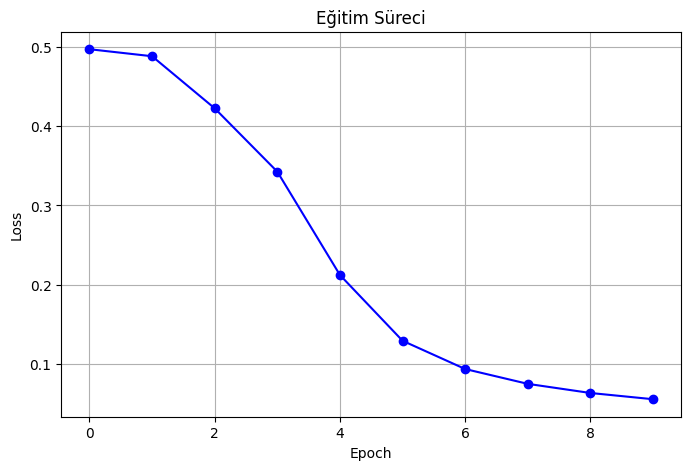

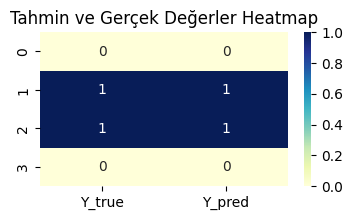

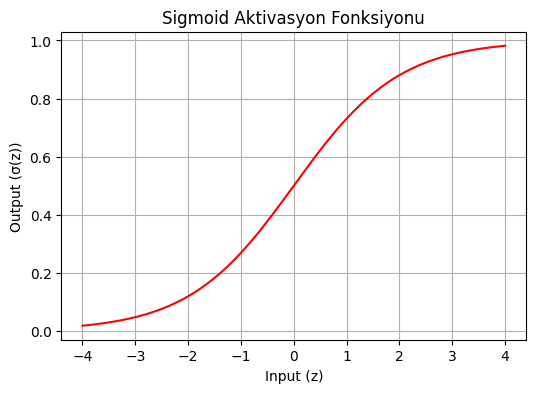

In [ ]:
import numpy as np
# Girdiler (X): 2 özellik
# Çıktılar (y): 1 sonuç

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])


# Nöronların çalışmasını sağlar (0 ile 1 arasında bir değer üretir)
def sigmoid(x):
  return 1/(1+np.exp(-x))

# Backward Pass için Sigmoid'in türevi lazım
def sigmoid_derivative(x):
  return x*(1-x)

# Hiperparametreler

# learning rate, gradient descent'ı etkilecediği için bu oranı güzel tutturmak önemlidir
# Bazen büyük adımlar atıp dip değeri yakalayamayabiliriz, loss 'un en az olduğu yeri bulmamıza yardımcı olur
learning_rate =1
epochs=1000

#Girdi, gizli ve çıktı katmanlarındaki nöron sayıları
input_neurons = 2
hidden_neurons = 4
output_neurons = 1
print("Eğitim Başlıyor....")

# ADIM 1: MİMARİ (FEED-FORWARD NETWORK)
np.random.seed(42)
#Ağırlıklar
W1 = np.random.uniform(size=(input_neurons, hidden_neurons))
W2 = np.random.uniform(size=(hidden_neurons, output_neurons))

# Bias
b1 = np.random.uniform(size=(1, hidden_neurons))
b2 = np.random.uniform(size=(1, output_neurons))
loss_list =[]

for i in range(epochs):
  # ADIM 2: FORWARD PASS
  # X'ten çıktıya doğru akar

  # 1.Katman(Gizli Katman)
  # Z1 = X * W1 +b1
  hidden_layer_input = np.dot(X,W1)+b1

  # h = sigmoid(Z1)
  hidden_layer_output = sigmoid(hidden_layer_input)

  # 2.Katman (Çıktı Katmanı)
  # Z2 = h * W2 + b2

  output_layer_input = np.dot(hidden_layer_output,W2) + b2
  # y_hat = sigmoid(Z2)
  predicted_output = sigmoid(output_layer_input)

  #Hata Hesaplama y --> gerçek değer
  error = y - predicted_output
  if(i % 100)==0:
    loss = np.mean(np.abs(error)) # Ortalama Mutlak Hata
    print(f" Epoch{i}, Loss: {loss:.4f}")
    loss_list.append(loss)
  # Adım 3 BACKWARD PASS
  # Ağırlıkları güncelleme

  # 1. Çıktı Katmannın Gradyanı

  d_predicted_output = error * sigmoid_derivative(predicted_output)

  # 2. Gizli Katman
  error_hidden_layer = d_predicted_output.dot(W2.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  # ADIM 4: AĞIRLIK GÜNCELLEME (GRADIENT DESCENT)

  W2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
  b2 += np.sum(d_predicted_output,axis=0, keepdims=True) *learning_rate

  W1 += X.T.dot(d_hidden_layer) * learning_rate
  b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate



print("\nAntrenman tamamlandı.")
print("Modelin son tahminleri:")
print(predicted_output)

print("\nBeklenen Çıktılar:")
print(y)

print("\nModelin Testi (Tahminleri 0 veya 1'e yuvarla):")
final_predictions = (predicted_output > 0.5).astype(int)
print(final_predictions)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(loss_list, marker='o', linestyle='-', color='blue')  # çizgi grafiği
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Eğitim Süreci")
plt.grid(True)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({
    "Y_true": y.flatten(),
    "Y_pred": final_predictions.flatten()
})
plt.figure(figsize=(4,2))
sns.heatmap(df[["Y_true","Y_pred"]], annot=True, cmap="YlGnBu")
plt.title("Tahmin ve Gerçek Değerler Heatmap")
plt.show()




x = np.linspace(-4, 4, 200)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(6,4))
plt.plot(x, y, color='red')
plt.title("Sigmoid Aktivasyon Fonksiyonu")
plt.xlabel("Input (z)")
plt.ylabel("Output (σ(z))")
plt.grid(True)
plt.show()



# Summary

# 1. Problem ve Veri

Girdiler(X) : 2 özellikli (0 veya 1)
Çıktılar (y): 0 veya 1
Amaç: Ağın XOR ilişkisini öğrenmesi

# 2. Ağ Mimarisi
Katman	Nöron Sayısı	Aktivasyon
Input	       2	           –
Hidden	     4	         Sigmoid
Output	     1	         Sigmoid

# 3. Aktivasyon Fonksiyonu

Sigmoid: 0–1 arasında çıktı üretir

Hidden ve output katmanında kullanıldı

sigmoid_derivative(x) → backpropagation için türev gerekli

# 4. Forward Pass
Hidden Layer Input: Z1 W1 * X + b1
Hidden Layer Output: h = sigmoid(Z1)
Output Layer Input: Z2 = h * W2 + b2
Predicted Output: sigmoid(Z2)

# 5. Loss ve Learning Rate
Loss: Ortalama Mutlak Hata(MAE)  loss = mean(|y -y^|)
Learning Rate: 0.5 -> loss düzgün şekilde azalma gösterdi.
Learning Rate ağın öğrenmesini doğrudan etkiler

# 6. Backward Pass
Çıkış gradyanı: d_predicted_output = error * sigmoid_derivative(predicted_output)

Gizli katman gradyanı: d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

Zincir kuralı uygulanıyor: loss → output → hidden → ağırlık güncelle

# 7. Ağırlık Güncelleme

W := W + learning_rate * gradyan
b := b + learning_rate * gradyan

Gradient descent ile ağırlıklar her epoch’ta güncellenir

# 8. Eğitim Süreci ve Epoch
Epoch: Tüm veri setinin bir defa ağdan geçirilmesi
1000 Epoch yapılmıştır.
Loss listesi ile her epoch sonrası hatalar izlenmiştir.


# 9. Önemli Noktalar
10. Can Alıcı Noktalar

*XOR problemi lineer olarak ayrılamaz, bu yüzden gizli katman gerekli

*Sigmoid aktivasyonu, hidden ve output katmanında kullanıldı

*Learning rate çok düşükse ağ öğrenemiyor, uygun değer seçilmeli

*Forward pass ve backward pass zincir kuralı ile loss türevleri kullanılarak hesaplanıyor

*Loss grafiği ve heatmap ile ağ performansı ve tahminleri görselleştirilebilir